## 0.libaries

In [151]:
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io.edf import read_raw_edf
from mne.channels import make_standard_montage

## 1. Preproseccing

In [90]:
execution = [5, 9, 13]
imagery = [6, 10, 14]
raw_execution = []
raw_imagery = []
raw_raws = []

Each annotation includes one of three codes (T0, T1, or T2):
    T0 corresponds to rest
    T1 corresponds to onset of motion (real or imagined) of the left fist (in runs 3, 4, 7, 8, 11, and 12)
    both fists (in runs 5, 6, 9, 10, 13, and 14)
    T2 corresponds to onset of motion (real or imagined) of the right fist (in runs 3, 4, 7, 8, 11, and 12) both feet (in runs 5, 6, 9, 10, 13, and 14)
In the BCI2000-format versions of these files these annotations are encoded as values of 0, 1, or 2 in the TargetCode state variable.

In [91]:
testee = 1
for e, i in zip(execution, imagery):
    raw_execution = [read_raw_edf(raw, preload=True) for raw in eegbci.load_data(testee, e)]
    raw_imagery = [read_raw_edf(raw, preload=True) for raw in eegbci.load_data(testee, i)]

    execution = mne.concatenate_raws(raw_execution)
    imagery = mne.concatenate_raws(raw_imagery)

    mapping_e = {1:'e-rest', 2:'e-fist', 3:'e-feet'}
    mapping_i = {1:'i-rest', 2:'i-fist', 3:'i-feet'}

    events_i, _ = mne.events_from_annotations(imagery, event_id=dict(T0=1, T1=2, T2=3))
    events_e, _ = mne.events_from_annotations(execution, event_id=dict(T0=1, T1=2, T2=3))

    annotations_e = mne.annotations_from_events(events_e, event_desc=mapping_e, sfreq=imagery.info['sfreq'])
    annotations_i = mne.annotations_from_events(events_i, event_desc=mapping_i, sfreq=imagery.info['sfreq'])

    execution.set_annotations(annotations_e)
    imagery.set_annotations(annotations_i)

    raw_raws.append(execution)
    raw_raws.append(imagery)



Extracting EDF parameters from C:\Users\Vladimir\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Vladimir\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Used Annotations descriptions: ['T0', 'T1', 'T2']
Extracting EDF parameters from C:\Users\Vladimir\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from C:\Users\Vladimir\mne_data\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setti

In [105]:
raw = mne.concatenate_raws(raw_raws)

In [160]:
print(raw.info)
events, events_dict = mne.events_from_annotations(raw)

<Info | 8 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 EEG
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_date: 2009-08-12 16:15:00 UTC
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>
Used Annotations descriptions: ['e-feet', 'e-fist', 'e-rest', 'i-feet', 'i-fist', 'i-rest']


The data are provided here in EDF+ format (containing 64 EEG signals, each sampled at 160 samples per second, and an annotation channel).
Electrodes are below

In [102]:
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False, exclude='bads')
print(picks)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


Creating RawArray with float64 data, n_channels=64, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


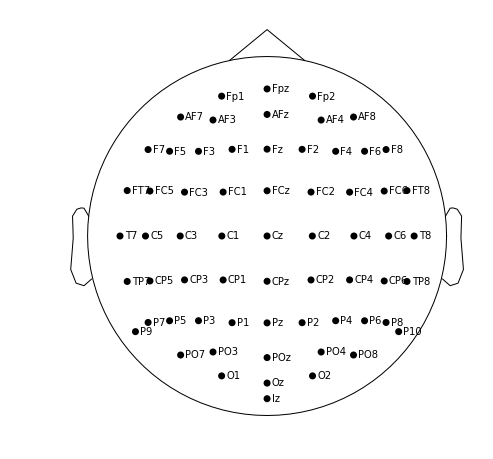

In [152]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
biosemi_montage.plot()
plt.show()

In [ ]:
eegbci.standardize(raw)
montage = make_standard_montage('standard_1005') # ????
raw.set_montage(montage)

Plot with a raw data

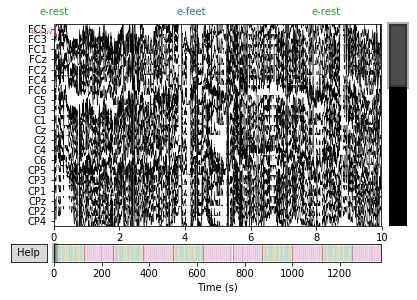

In [155]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html
raw.plot()
# raw.plot(n_channels=5, duration = 2.5)
plt.show()

Plot with a filtered data

Effective window size : 12.800 (s)


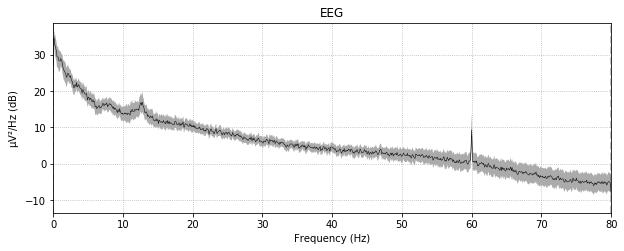

In [156]:
# Plot the power spectral density across channels.
# magnitude square of fourier transform
raw.plot_psd(average=True)
plt.show()

Effective window size : 12.800 (s)


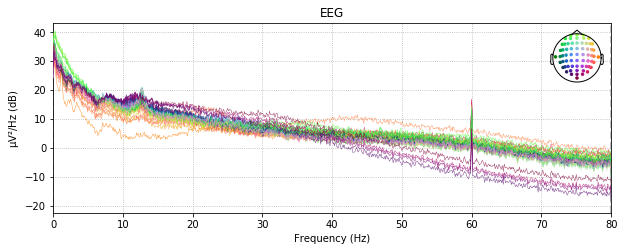

In [157]:
raw.plot_psd(average=False)
plt.show()

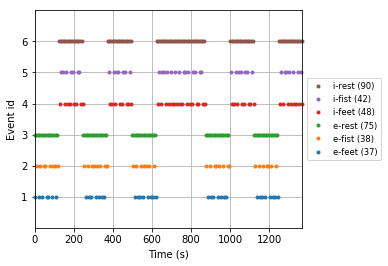

In [162]:
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, event_id=events_dict)
fig.subplots_adjust(right=0.7)